<img style="float: right;" width="120" src="https://s3.eu-west-1.amazonaws.com/neueda.conygre.com/pydata/images/neueda-logo.jpeg">
<br><br><br>

# Classification with Keras/Tensorflow

This notebook uses keras and tensorflow to classify 8x8 pixel handwritten images of digits.

We will train our neural network using the mnist handwriting dataset which is labelled handwritten digits.

In this notebook we'll compare the use of sklearn Vs Keras/Tensorflow by training a model with both libraries.

## 1. Load Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('http://neueda.conygre.com/pydata/ml_fc/mnist8x8.csv')
print(df.shape)
df.head()

(1797, 65)


,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## 2. Analyse/Shape/Clean Data

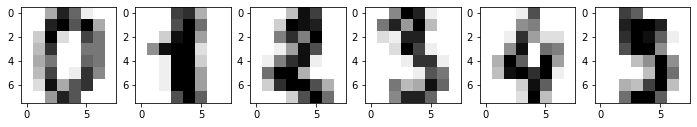

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

num_plots = 6

fig, axes = plt.subplots(1, num_plots, figsize=(12, 7))

for i in range(num_plots):
    data = df.iloc[i, :-1].to_numpy()
    axes[i].imshow( np.reshape(data, (8, 8)), cmap=plt.cm.gray_r )

## 3. Select independent and dependent variables

As with previous supervised learning scenarios we separate our features from the labels

In [4]:
# X is all except the last column
X = df.iloc[:, :-1]

# y is the 'label' column
y = df['label']

## 4. Train-test split

We'll use ```sklearn.model_selection.train_test_split```

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## 5. Select, configure and train model

The sklearn MLPClassifier is a simple Multi-Layer Perceptron classifier

This is a functional and very usefule neural network model, though it has less configurability than the keras/tensorflow version

In [6]:
# TODO:Pick a classification model
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(50, 32), max_iter=500)

model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 32), max_iter=500)

## 6. Verification with a confusion matrix

Use the sklearn.metrics package to create a confusion matrix

This package has a ```plot_confusion_matrix``` function that takes a model, test features and test labels

Confusion matrix:
 [[11  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  0]
 [ 0  1  0  0  0  0 24  0  0  0]
 [ 0  0  0  0  1  0  0 19  0  0]
 [ 0  1  0  0  0  0  1  0 21  0]
 [ 0  0  0  0  0  1  0  1  0 22]]
Accuracy: 0.9666666666666667


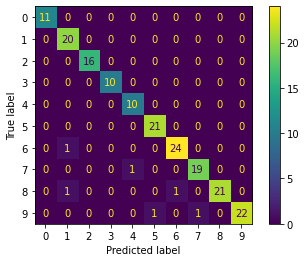

In [7]:
from sklearn import metrics

disp = metrics.plot_confusion_matrix(model, X_test, y_test)

print("Confusion matrix:\n", disp.confusion_matrix)
cmatrix = disp.confusion_matrix

correct = 0
for i in range(len(cmatrix)):
        correct += cmatrix[i][i]

print('Accuracy:', correct / cmatrix.sum())

plt.show()

In [8]:
# we can install tensorflow and keras with pip
# only do this if they are not yet installed on your system
# !pip install tensorflow keras

In [9]:
# import tensorflow as tf
import datetime
import tensorflow as tf

# let's create some layers
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(50, input_dim=64, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dense(32, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dense(10, kernel_initializer='normal', activation='softmax'))

In [10]:
# tensorboard is a tensorflow extension that gives observability of the training phase
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=X_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(X_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/5
 1/51 [..............................] - ETA: 0s - loss: 2.3423 - accuracy: 0.1562WARNING:tensorflow:From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


NotFoundError: Failed to create a NewWriteableFile: logs/fit/20220525-055035\train\plugins\profile\2022_05_25_04_50_35\DESKTOP-IPHJKNB.memory_profile.json.gz : The system cannot find the path specified.
; No such process

Take a look at the classes predicted by the model for the test data

In [ ]:
# now predict for the test data
# we use numpy argmax to output the class that had the maximum probability
import numpy as np
predicted = np.argmax(model.predict(X_test), axis=1)
predicted

Consider the accuracy of the model with a confusion matrix

This can still use the sklearn.metrics package, though the data came from keras/tensorflow

In [ ]:
from sklearn.metrics import confusion_matrix

cmatrix = confusion_matrix(y_test, predicted)

print(cmatrix)

correct = 0
for i in range(len(cmatrix)):
    correct += cmatrix[i][i]
    
print('Accuracy:', correct / cmatrix.sum())

tensorboard is a tool that can analyse the logs from a training run of a tensorflow model 

In [ ]:
# if tensorboard is installed, we can load it
%load_ext tensorboard

In [ ]:
# if tensorboard is installed, we can observe what happened by having it analyse the logs
%tensorboard --logdir logs/fit